<a href="https://colab.research.google.com/github/Sharzla/UniProjects/blob/main/Vaccine_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
vaccine = pd.read_csv('CV19Vaccine.csv')
vaccine.head()

,tweet,scores,compound,label,length,positive,negative
0,"Cool cool , vaccine supplies were diverted fro...","{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...",0.7506,pos,18,0.346,0.000
1,"Please , stop using term ‘ Covid vaccine ’ . T...","{'neg': 0.126, 'neu': 0.743, 'pos': 0.131, 'co...",0.0258,pos,22,0.131,0.126
2,Mullahs religious fundamentalists Pakistan tod...,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.1027,neg,13,0.000,0.113
3,Beware this Covid-19 vaccine NHS email scam ex...,"{'neg': 0.345, 'neu': 0.473, 'pos': 0.182, 'co...",-0.3400,neg,11,0.182,0.345
4,Merck abandons 2 potential COVID-19 vaccines o...,"{'neg': 0.426, 'neu': 0.574, 'pos': 0.0, 'comp...",-0.6369,neg,12,0.000,0.426


In [ ]:
vaccine = vaccine.iloc[:, [0,2,3]]
vaccine.head()

,tweet,compound,label
0,"Cool cool , vaccine supplies were diverted fro...",0.7506,pos
1,"Please , stop using term ‘ Covid vaccine ’ . T...",0.0258,pos
2,Mullahs religious fundamentalists Pakistan tod...,-0.1027,neg
3,Beware this Covid-19 vaccine NHS email scam ex...,-0.3400,neg
4,Merck abandons 2 potential COVID-19 vaccines o...,-0.6369,neg


In [ ]:
vaccine = vaccine[vaccine['label'] != 'neu']
vaccine.head()

,tweet,compound,label
0,"Cool cool , vaccine supplies were diverted fro...",0.7506,pos
1,"Please , stop using term ‘ Covid vaccine ’ . T...",0.0258,pos
2,Mullahs religious fundamentalists Pakistan tod...,-0.1027,neg
3,Beware this Covid-19 vaccine NHS email scam ex...,-0.3400,neg
4,Merck abandons 2 potential COVID-19 vaccines o...,-0.6369,neg


In [ ]:
# convert label to numeric
sentiment_label = vaccine.label.factorize()
print(sentiment_label)

(array([0, 0, 1, ..., 1, 0, 0]), Index(['pos', 'neg'], dtype='object'))


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweets = vaccine.tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=100)

In [ ]:
print(tokenizer.word_index)

{'vaccine': 1, 'covid': 2, '19': 3, 'i': 4, '’': 5, 'it': 6, 'on': 7, 'novavax': 8, 'effective': 9, 'you': 10, 's': 11, 'my': 12, 'this': 13, 'get': 14, 'not': 15, "'s": 16, 'with': 17, 'against': 18, 'but': 19, 'from': 20, 'uk': 21, 'people': 22, 'we': 23, 'has': 24, 'about': 25, 'more': 26, 'they': 27, 'getting': 28, 'doses': 29, 'after': 30, 'no': 31, 'if': 32, 'who': 33, 'first': 34, '…': 35, 'health': 36, 'will': 37, 'at': 38, '89': 39, 'africa': 40, 'got': 41, 'news': 42, 't': 43, 'do': 44, 'vaccines': 45, 'variant': 46, 'south': 47, 'can': 48, 'all': 49, 'like': 50, 'its': 51, 'by': 52, '“': 53, 'says': 54, 'just': 55, 'what': 56, 'your': 57, 'new': 58, "n't": 59, 'one': 60, 'me': 61, 'out': 62, 'good': 63, 'trial': 64, 'how': 65, 'via': 66, 'dose': 67, 'an': 68, 'amp': 69, 'well': 70, 'there': 71, 'now': 72, 'our': 73, 'up': 74, 'could': 75, 'million': 76, 'when': 77, 'less': 78, "''": 79, 'than': 80, 'us': 81, 'had': 82, 'today': 83, 'he': 84, 'm': 85, 'their': 86, 'take': 87,

In [ ]:
print(tweets[0])
print(encoded_docs[0])

Cool cool , vaccine supplies were diverted from north east because they were too efficient at vaccinating the…
[1641, 1641, 1, 632, 110, 3140, 20, 1160, 1642, 117, 27, 110, 249, 915, 38, 829, 329]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 1641
 1641    1  632  110 3140   20 1160 1642  117   27  110  249  915   38
  829  329]


In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=100) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           227776    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 244,427
Trainable params: 244,427
Non-trainable params: 0
_________________________________________________________________
None


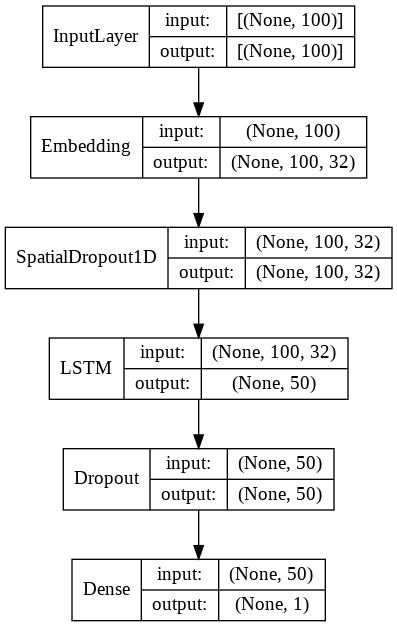

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
82/82 [==============================] - 12s 120ms/step - loss: 0.6778 - accuracy: 0.5835 - val_loss: 0.6019 - val_accuracy: 0.6534
Epoch 2/5
82/82 [==============================] - 9s 116ms/step - loss: 0.5305 - accuracy: 0.7112 - val_loss: 0.5135 - val_accuracy: 0.7439
Epoch 3/5
82/82 [==============================] - 10s 117ms/step - loss: 0.3653 - accuracy: 0.8610 - val_loss: 0.4613 - val_accuracy: 0.7561
Epoch 4/5
82/82 [==============================] - 10s 117ms/step - loss: 0.2183 - accuracy: 0.9251 - val_loss: 0.4945 - val_accuracy: 0.7454
Epoch 5/5
82/82 [==============================] - 10s 118ms/step - loss: 0.1620 - accuracy: 0.9359 - val_loss: 0.5079 - val_accuracy: 0.7761


In [ ]:
test_word ="Vaccine is bad for health and it is a scam!!"
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=100)
prediction = int(model.predict(tw).round().item())
sentiment_label[1][prediction]

'neg'

In [ ]:
from sklearn.model_selection import train_test_split

sentences = vaccine.tweet.values
y = vaccine.label.factorize()

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1
encoded = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(encoded, maxlen=200)

sentences_train, sentences_test, y_train, y_test = train_test_split(padded, y[0], test_size=0.25, random_state=1000)

In [ ]:
history = model.fit(sentences_train, y_train,
                  validation_data=(sentences_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
77/77 [==============================] - 15s 198ms/step - loss: 0.1843 - accuracy: 0.9296 - val_loss: 0.1542 - val_accuracy: 0.9399
Epoch 2/5
77/77 [==============================] - 16s 207ms/step - loss: 0.1451 - accuracy: 0.9480 - val_loss: 0.1541 - val_accuracy: 0.9387
Epoch 3/5
77/77 [==============================] - 16s 206ms/step - loss: 0.1047 - accuracy: 0.9599 - val_loss: 0.1747 - val_accuracy: 0.9337
Epoch 4/5
77/77 [==============================] - 16s 204ms/step - loss: 0.0778 - accuracy: 0.9738 - val_loss: 0.1950 - val_accuracy: 0.9178
Epoch 5/5
77/77 [==============================] - 16s 204ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.2091 - val_accuracy: 0.9202


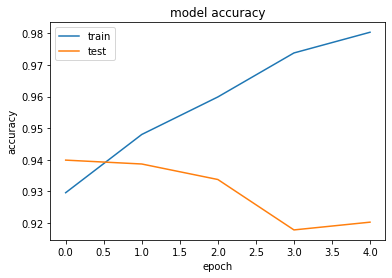

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

yhat_probs = model.predict(y_test, verbose=0)
yhat_classes = model.predict_classes(y_test, verbose=0)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
model.evaluate(padded_sequence, sentiment_label[0])

102/102 [==============================] - 1s 14ms/step - loss: 0.1587 - accuracy: 0.9395


[0.15872623026371002, 0.9395148754119873]

In [ ]:
history.history['accuracy']

[0.6057581305503845,
 0.7562379837036133,
 0.8698656558990479,
 0.9239923357963562,
 0.9439539313316345]

In [ ]:
df_acc = pd.DataFrame(history.history['accuracy'])
df_acc.head()

,0
0,0.605758
1,0.756238
2,0.869866
3,0.923992
4,0.943954


In [ ]:
df_acc = df_acc.rename(columns={0:'Accuracy'})
df_acc.head()

,Accuracy
0,0.605758
1,0.756238
2,0.869866
3,0.923992
4,0.943954


In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

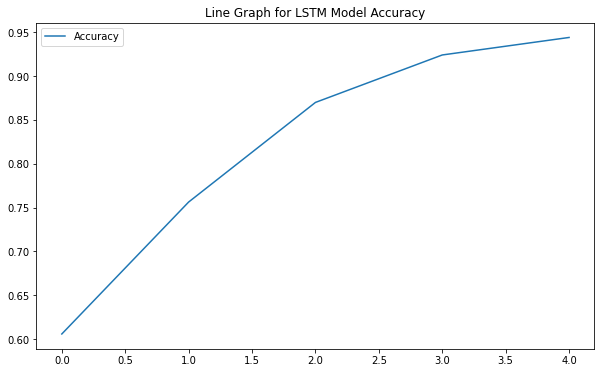

In [ ]:
df_acc.plot(kind='line', figsize=(10,6))
plt.title('Line Graph for LSTM Model Accuracy') # add a title to the histogram
plt.show()